# **Summary of Work - Milestone 1**:

**1. Data Acquisition and Preprocessing**

**Dataset 1:** Occupational Employment and Wage Statistics (OES) data:

*   Downloaded OES data for years 2011-2023 in Excel format (.xlsx).
*   Standardized column names to uppercase and replaced spaces with underscores for uniformity.
*   Converted data types for consistency (e.g., numeric, string).
*   **Saved processed OES data as pickle files** for each year and later merged them into a single file.

**Dataset 2:** College Scorecard (CSC) data:

*   Downloaded CSC data for years 2011-2023 in CSV format.
*   Selected relevant columns for education and occupation information.
*   Calculated degree counts by CIP code and grouped data by state FIPS code.
*   **Saved processed CSC data as pickle files** for each year and later merged them into a single file.

**Dataset 3:** NCEI Weather data:
* Download NCEI weather data for years 2011-2023 in CSV format.
* Aggregate by state and US as a whole for average temperature and precipitation.
*   **Saved processed NCEI data as pickle files** for each year and later merged them into a single file.

<br><br>
**2. Data Analysis**

*   **Loaded the processed OES data (pickle file).**
*   Explored the distribution of hourly and annual wages.
*   Identified top occupations and industries based on mean hourly wage
*   Visualized wage distributions using histograms and bar plots.
<br><br>

**Team Contributions**

The work of this notebook was distributed as follows:

| Name              | Contribution | Details                    |
|-------------------|--------------|----------------------------|
| Shashank Kushwaha |    25%       | Coordinate the group, downloaded initial datasets, enhanced overall code   |
| Johann J Cardenas |    25%       | Extended and processed datasets, cleaned files and added initial |
| Manoj Lakshmi     |    25%       | Drafted initial code for data processing and pickling, refined analysis code   |
| Nghia Dai Nguyen  |    25%       | Review, debug and enhanced overall code. Finetuned 1st deliverable |

This distribution of effort was approved by

- Shashank Kushwaha (sk89@illinois.edu )
- Johann Cardenas Huaman (johannc2@illinois.edu)
- Manoj Lakshmi (lmanoj2@illinois.edu)
- Nghia Dai Nguyen (nghiadn2@illinois.edu)



In [1]:
# Installing neccessary packages
!pip install python-calamine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 13.4 MB/s eta 0:00:00


#**Data Pre-Processing**

In [2]:
# Importing Libraries
import os
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm
from multiprocessing.pool import Pool
from IPython.display import display
from functools import partial

In [3]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_dir = 'drive/MyDrive/Deep_Dive_Project_Group_12'  # root directory
data_dir = os.path.join(base_dir, 'data_new')          # data directory

oes_dir = os.path.join(data_dir, 'occupational_employment_and_wage')  # Occupational Employment and Wage (OES) directory
csc_dir = os.path.join(data_dir, 'college_scorecard')                 # College Scorecard (CSC) directory
ncei_dir = os.path.join(data_dir, 'ncei_weather')  # NCEI Weather directory

oes_raw_dir = os.path.join(oes_dir, 'raw')               # OES raw data directory
oes_processed_dir = os.path.join(oes_dir, 'processed')   # OES processed data directory

csc_raw_dir = os.path.join(csc_dir, 'raw')               # CSC raw data directory
csc_processed_dir = os.path.join(csc_dir, 'processed')   # CSC processed data directory

ncei_raw_dir = os.path.join(ncei_dir, 'raw')               # NCEI Weather raw data directory
ncei_processed_dir = os.path.join(ncei_dir, 'processed')   # NCEI Weather processed data directory

for data_dir in [
    oes_raw_dir,
    oes_processed_dir,
    csc_raw_dir,
    csc_processed_dir,
    ncei_raw_dir,
    ncei_processed_dir
]:
    os.makedirs(data_dir, exist_ok=True)

# Functions to call specific datasets
def oes_raw_name(year: int, ext: str):
    return f'oes_{year}.{ext}'

def oes_processed_name(year: int, ext: str):
    return f'oes_{year}.{ext}'

def csc_raw_name(year: int, ext: str):
    return f'MERGED{year-1}_{str(year)[2:]}_PP.{ext}'

def csc_processed_name(year: int, ext: str):
    return f'csc_{year}.{ext}'

to_float = partial(pd.to_numeric, errors='coerce')
to_str = lambda series: series.astype(str, copy=True)

years = [
    2023, 2022, 2021, 2020, 2019, 2018, 2017,
    2016, 2015, 2014, 2013, 2012, 2011
]

## **Data Import and Serialization**



### **Occupational Employment and Wage Statistics (OES)**
> **Note:** This cell has already been run once by the team to load and pre-processed raw files. It is a time-demanding task due to the file size. For further efforts, only the pickle files should be loaded to continue working on them.

In [ ]:
# Loading the datasets in csv/xlsx format (from 2011 to 2023)
oes_raw_dfs = {
    year: pd.read_excel(
        os.path.join(oes_raw_dir, oes_raw_name(year, 'xlsx')),
        sheet_name=0,
        engine='calamine',
    )
    for year in tqdm(years)
}

print(f"First few rows of 2023 data:")
display(oes_raw_dfs[2023].head())

print('Dataframe informations:')
for df in oes_raw_dfs.values():
    print('=' * 50)
    display(df.info())

  0%|          | 0/13 [00:00<?, ?it/s]

First few rows of 2023 data:


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN


Dataframe informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          413327 non-null  int64 
 1   AREA_TITLE    413327 non-null  object
 2   AREA_TYPE     413327 non-null  int64 
 3   PRIM_STATE    413327 non-null  object
 4   NAICS         413327 non-null  object
 5   NAICS_TITLE   413327 non-null  object
 6   I_GROUP       413327 non-null  object
 7   OWN_CODE      413327 non-null  int64 
 8   OCC_CODE      413327 non-null  object
 9   OCC_TITLE     413327 non-null  object
 10  O_GROUP       413327 non-null  object
 11  TOT_EMP       413327 non-null  object
 12  EMP_PRSE      413327 non-null  object
 13  JOBS_1000     235826 non-null  object
 14  LOC_QUOTIENT  235826 non-null  object
 15  PCT_TOTAL     170470 non-null  object
 16  PCT_RPT       170470 non-null  object
 17  H_MEAN        413327 non-null  object
 18  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409859 entries, 0 to 409858
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409859 non-null  int64 
 1   AREA_TITLE    409859 non-null  object
 2   AREA_TYPE     409859 non-null  int64 
 3   PRIM_STATE    409859 non-null  object
 4   NAICS         409859 non-null  object
 5   NAICS_TITLE   409859 non-null  object
 6   I_GROUP       409859 non-null  object
 7   OWN_CODE      409859 non-null  int64 
 8   OCC_CODE      409859 non-null  object
 9   OCC_TITLE     409859 non-null  object
 10  O_GROUP       409859 non-null  object
 11  TOT_EMP       409859 non-null  object
 12  EMP_PRSE      409859 non-null  object
 13  JOBS_1000     234012 non-null  object
 14  LOC_QUOTIENT  234012 non-null  object
 15  PCT_TOTAL     168772 non-null  object
 16  PCT_RPT       168772 non-null  object
 17  H_MEAN        409859 non-null  object
 18  A_MEAN        409859 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406359 entries, 0 to 406358
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          406359 non-null  int64 
 1   AREA_TITLE    406359 non-null  object
 2   AREA_TYPE     406359 non-null  int64 
 3   PRIM_STATE    406359 non-null  object
 4   NAICS         406359 non-null  object
 5   NAICS_TITLE   406359 non-null  object
 6   I_GROUP       406359 non-null  object
 7   OWN_CODE      406359 non-null  int64 
 8   OCC_CODE      406359 non-null  object
 9   OCC_TITLE     406359 non-null  object
 10  O_GROUP       406359 non-null  object
 11  TOT_EMP       406359 non-null  object
 12  EMP_PRSE      406359 non-null  object
 13  JOBS_1000     232664 non-null  object
 14  LOC_QUOTIENT  232664 non-null  object
 15  PCT_TOTAL     166622 non-null  object
 16  PCT_RPT       166622 non-null  object
 17  H_MEAN        406359 non-null  object
 18  A_MEAN        406359 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390705 entries, 0 to 390704
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          390705 non-null  int64 
 1   AREA_TITLE    390705 non-null  object
 2   AREA_TYPE     390705 non-null  int64 
 3   PRIM_STATE    390705 non-null  object
 4   NAICS         390705 non-null  object
 5   NAICS_TITLE   390705 non-null  object
 6   I_GROUP       390705 non-null  object
 7   OWN_CODE      390705 non-null  int64 
 8   OCC_CODE      390705 non-null  object
 9   OCC_TITLE     390705 non-null  object
 10  O_GROUP       390705 non-null  object
 11  TOT_EMP       390705 non-null  object
 12  EMP_PRSE      390705 non-null  object
 13  JOBS_1000     221444 non-null  object
 14  LOC_QUOTIENT  221444 non-null  object
 15  PCT_TOTAL     162652 non-null  object
 16  H_MEAN        390705 non-null  object
 17  A_MEAN        390705 non-null  object
 18  MEAN_PRSE     390705 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            395647 non-null  int64  
 1   area_title      395647 non-null  object 
 2   area_type       395647 non-null  int64  
 3   naics           395647 non-null  object 
 4   naics_title     395647 non-null  object 
 5   i_group         395647 non-null  object 
 6   own_code        395647 non-null  int64  
 7   occ_code        395647 non-null  object 
 8   occ_title       395647 non-null  object 
 9   o_group         395647 non-null  object 
 10  tot_emp         395647 non-null  object 
 11  emp_prse        395647 non-null  object 
 12  jobs_1000_orig  225176 non-null  object 
 13  loc_quotient    207966 non-null  float64
 14  pct_total       165003 non-null  object 
 15  h_mean          395647 non-null  object 
 16  a_mean          395647 non-null  object 
 17  mean_prse 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          403895 non-null  int64 
 1   area_title    403895 non-null  object
 2   area_type     403895 non-null  int64 
 3   naics         403895 non-null  object
 4   naics_title   403895 non-null  object
 5   i_group       403895 non-null  object
 6   own_code      403895 non-null  int64 
 7   occ_code      403895 non-null  object
 8   occ_title     403895 non-null  object
 9   o_group       403895 non-null  object
 10  tot_emp       403895 non-null  object
 11  emp_prse      403895 non-null  object
 12  jobs_1000     227944 non-null  object
 13  loc_quotient  227944 non-null  object
 14  pct_total     169080 non-null  object
 15  h_mean        403895 non-null  object
 16  a_mean        403895 non-null  object
 17  mean_prse     403895 non-null  object
 18  h_pct10       403895 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427266 entries, 0 to 427265
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          427266 non-null  int64  
 1   area_title    427266 non-null  object 
 2   area_type     427266 non-null  int64  
 3   naics         427266 non-null  object 
 4   naics_title   427266 non-null  object 
 5   i_group       427266 non-null  object 
 6   own_code      427266 non-null  int64  
 7   occ_code      427266 non-null  object 
 8   occ_title     427266 non-null  object 
 9   o_group       427266 non-null  object 
 10  tot_emp       427266 non-null  object 
 11  emp_prse      427266 non-null  object 
 12  jobs_1000     252871 non-null  object 
 13  loc_quotient  252871 non-null  object 
 14  pct_total     167504 non-null  object 
 15  h_mean        427266 non-null  object 
 16  a_mean        427266 non-null  object 
 17  mean_prse     427266 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440879 entries, 0 to 440878
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          440879 non-null  int64  
 1   area_title    440879 non-null  object 
 2   area_type     440879 non-null  int64  
 3   naics         440879 non-null  object 
 4   naics_title   440879 non-null  object 
 5   own_code      439725 non-null  float64
 6   occ code      440879 non-null  object 
 7   occ title     440879 non-null  object 
 8   group         440879 non-null  object 
 9   tot_emp       440879 non-null  object 
 10  emp_prse      440879 non-null  object 
 11  jobs_1000     256320 non-null  object 
 12  loc_quotient  256320 non-null  object 
 13  pct_total     177614 non-null  object 
 14  h_mean        440879 non-null  object 
 15  a_mean        440879 non-null  object 
 16  mean_prse     440879 non-null  object 
 17  h_pct10       440879 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439942 entries, 0 to 439941
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          439942 non-null  int64  
 1   area_title    439942 non-null  object 
 2   area_type     439942 non-null  int64  
 3   naics         439942 non-null  object 
 4   naics_title   439942 non-null  object 
 5   own_code      439942 non-null  int64  
 6   occ code      439942 non-null  object 
 7   occ title     439942 non-null  object 
 8   group         439942 non-null  object 
 9   tot_emp       439942 non-null  object 
 10  emp_prse      439942 non-null  object 
 11  jobs_1000     256598 non-null  object 
 12  loc_quotient  256598 non-null  object 
 13  pct_total     176427 non-null  object 
 14  h_mean        439942 non-null  object 
 15  a_mean        439942 non-null  object 
 16  mean_prse     439942 non-null  object 
 17  h_pct10       439942 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435005 entries, 0 to 435004
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          435005 non-null  int64 
 1   area_title    435005 non-null  object
 2   area_type     435005 non-null  int64 
 3   naics         435005 non-null  object
 4   naics_title   435005 non-null  object
 5   own_code      435005 non-null  int64 
 6   occ code      435005 non-null  object
 7   occ title     435005 non-null  object
 8   group         435005 non-null  object
 9   tot_emp       435005 non-null  object
 10  emp_prse      435005 non-null  object
 11  jobs_1000     255167 non-null  object
 12  loc_quotient  255167 non-null  object
 13  pct_total     172899 non-null  object
 14  h_mean        435005 non-null  object
 15  a_mean        435005 non-null  object
 16  mean_prse     435005 non-null  object
 17  h_pct10       435005 non-null  object
 18  h_pct25       435005 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434473 entries, 0 to 434472
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          434473 non-null  int64 
 1   area_title    434473 non-null  object
 2   area_type     434473 non-null  int64 
 3   naics         434473 non-null  object
 4   naics_title   434473 non-null  object
 5   own_code      434473 non-null  int64 
 6   occ_code      434473 non-null  object
 7   occ_title     434473 non-null  object
 8   group         434473 non-null  object
 9   tot_emp       434473 non-null  object
 10  emp_prse      434473 non-null  object
 11  jobs_1000     255343 non-null  object
 12  loc_quotient  255343 non-null  object
 13  pct_total     172172 non-null  object
 14  h_mean        434473 non-null  object
 15  a_mean        434473 non-null  object
 16  mean_prse     434473 non-null  object
 17  h_pct10       434473 non-null  object
 18  h_pct25       434473 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432500 entries, 0 to 432499
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          432500 non-null  int64 
 1   area_title    432500 non-null  object
 2   area_type     432500 non-null  int64 
 3   naics         432500 non-null  object
 4   naics_title   432262 non-null  object
 5   own_code      432500 non-null  int64 
 6   occ_code      432500 non-null  object
 7   occ_title     432500 non-null  object
 8   group         432500 non-null  object
 9   tot_emp       432500 non-null  object
 10  emp_prse      432500 non-null  object
 11  jobs_1000     254168 non-null  object
 12  loc_quotient  254168 non-null  object
 13  pct_tot       171410 non-null  object
 14  h_mean        432500 non-null  object
 15  a_mean        432500 non-null  object
 16  mean_prse     432500 non-null  object
 17  h_pct10       432500 non-null  object
 18  h_pct25       432500 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338570 entries, 0 to 338569
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AREA         338570 non-null  int64  
 1   AREA_TITLE   338570 non-null  object 
 2   AREA_TYPE    338570 non-null  int64  
 3   NAICS        338570 non-null  object 
 4   NAICS_TITLE  338458 non-null  object 
 5   OWN_CODE     338570 non-null  int64  
 6   OCC_CODE     338570 non-null  object 
 7   OCC_TITLE    338570 non-null  object 
 8   GROUP        23245 non-null   object 
 9   TOT_EMP      338570 non-null  object 
 10  EMP_PRSE     338570 non-null  object 
 11  JOBS_1000    248591 non-null  object 
 12  LOC_Q        248591 non-null  object 
 13  PCT_TOT      86117 non-null   object 
 14  H_MEAN       338570 non-null  object 
 15  A_MEAN       338570 non-null  object 
 16  MEAN_PRSE    338570 non-null  object 
 17  H_PCT10      338570 non-null  object 
 18  H_PCT25      338570 non-

None

In [ ]:
# Some column names are lowercase or have spaces in the middle
for df in oes_raw_dfs.values():
    df.rename(
        columns={column: column.upper().replace(' ', '_') for column in df.columns},
        inplace=True
    )

# Rename some columns
for df in oes_raw_dfs.values():
    columns = list(df.columns)
    if 'PCT_TOT' in columns:
        df.rename(columns={'PCT_TOT': 'PCT_TOTAL'}, inplace=True)
    if 'LOC_Q' in columns:
        df.rename(columns={'LOC_Q': 'LOC_QUOTIENT'}, inplace=True)
    if 'JOBS_1000_ORIG' in columns:
        df.rename(columns={'JOBS_1000_ORIG': 'JOBS_1000'}, inplace=True)

    # We don't convert GROUP to O_GROUP since GROUP has lots of missing data

# Set up common columns
oes_common_columns = set(oes_raw_dfs[2023].columns)
for year, df in oes_raw_dfs.items():
    if year != 2023:
        oes_common_columns.intersection_update(df.columns)

oes_uncommon_columns = set(column for df in oes_raw_dfs.values() for column in df.columns) - oes_common_columns

print('Number of common columns:', len(oes_common_columns))
display(oes_common_columns)

print('Number of non-common columns:', len(oes_uncommon_columns))
display(oes_uncommon_columns)

Number of common columns: 28


{'ANNUAL',
 'AREA',
 'AREA_TITLE',
 'AREA_TYPE',
 'A_MEAN',
 'A_MEDIAN',
 'A_PCT10',
 'A_PCT25',
 'A_PCT75',
 'A_PCT90',
 'EMP_PRSE',
 'HOURLY',
 'H_MEAN',
 'H_MEDIAN',
 'H_PCT10',
 'H_PCT25',
 'H_PCT75',
 'H_PCT90',
 'JOBS_1000',
 'LOC_QUOTIENT',
 'MEAN_PRSE',
 'NAICS',
 'NAICS_TITLE',
 'OCC_CODE',
 'OCC_TITLE',
 'OWN_CODE',
 'PCT_TOTAL',
 'TOT_EMP'}

Number of non-common columns: 5


{'GROUP', 'I_GROUP', 'O_GROUP', 'PCT_RPT', 'PRIM_STATE'}

In [ ]:
# Convert columns to appropriate types
oes_column_cast_fns = {
    'ANNUAL': to_float, # bool, but bool cannot have NaN
    'AREA': to_str,
    'AREA_TITLE': to_str,
    'AREA_TYPE': to_str,
    'A_MEAN': to_float,
    'A_MEDIAN': to_float,
    'A_PCT10': to_float,
    'A_PCT25': to_float,
    'A_PCT75': to_float,
    'A_PCT90': to_float,
    'EMP_PRSE': to_float,
    'HOURLY': to_float, # bool, but bool cannot have NaN
    'H_MEAN': to_float,
    'H_MEDIAN': to_float,
    'H_PCT10': to_float,
    'H_PCT25': to_float,
    'H_PCT75': to_float,
    'H_PCT90': to_float,
    'JOBS_1000': to_float,
    'LOC_QUOTIENT': to_float,
    'MEAN_PRSE': to_float,
    'NAICS': to_str,
    'NAICS_TITLE': to_str,
    'OWN_CODE': to_str,
    'OCC_CODE': to_str,
    'OCC_TITLE': to_str,
    'PCT_TOTAL': to_float,
    'TOT_EMP': to_float # int, but int cannot have NaN
}

# Sanity check
assert len(oes_column_cast_fns) == len(oes_common_columns)
for column in oes_column_cast_fns.keys():
    assert column in oes_common_columns

oes_processed_dfs = {
    year: pd.DataFrame(
        {
            column: cast_fn(df[column])
            for column, cast_fn in oes_column_cast_fns.items()
        }
    )
    for year, df in tqdm(oes_raw_dfs.items())
}
for year, df in tqdm(oes_processed_dfs.items()):
    df['YEAR'] = year

print(f"First few rows of 2023 data:")
display(oes_processed_dfs[2023].head())

print('Dataframe informations:')
for df in oes_processed_dfs.values():
    print('=' * 50)
    display(df.info())

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

First few rows of 2023 data:


,ANNUAL,AREA,AREA_TITLE,AREA_TYPE,A_MEAN,A_MEDIAN,A_PCT10,A_PCT25,A_PCT75,A_PCT90,...,LOC_QUOTIENT,MEAN_PRSE,NAICS,NAICS_TITLE,OWN_CODE,OCC_CODE,OCC_TITLE,PCT_TOTAL,TOT_EMP,YEAR
0,NaN,99,U.S.,1,65470.0,48060.0,29050.0,35660.0,76980.0,121470.0,...,NaN,0.3,000000,Cross-industry,1235,00-0000,All Occupations,NaN,151853870.0,2023
1,NaN,99,U.S.,1,137750.0,116880.0,54550.0,78330.0,169090.0,231620.0,...,NaN,0.5,000000,Cross-industry,1235,11-0000,Management Occupations,NaN,10495770.0,2023
2,NaN,99,U.S.,1,136100.0,103460.0,46400.0,66170.0,165500.0,NaN,...,NaN,0.9,000000,Cross-industry,1235,11-1000,Top Executives,NaN,3751510.0,2023
3,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1010,Chief Executives,NaN,211230.0,2023
4,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1011,Chief Executives,NaN,211230.0,2023


Dataframe informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        16497 non-null   float64
 1   AREA          413327 non-null  object 
 2   AREA_TITLE    413327 non-null  object 
 3   AREA_TYPE     413327 non-null  object 
 4   A_MEAN        407975 non-null  float64
 5   A_MEDIAN      405853 non-null  float64
 6   A_PCT10       407974 non-null  float64
 7   A_PCT25       407512 non-null  float64
 8   A_PCT75       402721 non-null  float64
 9   A_PCT90       395483 non-null  float64
 10  EMP_PRSE      401729 non-null  float64
 11  HOURLY        755 non-null     float64
 12  H_MEAN        392363 non-null  float64
 13  H_MEDIAN      390268 non-null  float64
 14  H_PCT10       392363 non-null  float64
 15  H_PCT25       391901 non-null  float64
 16  H_PCT75       387208 non-null  float64
 17  H_PCT90       380319 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409859 entries, 0 to 409858
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        16052 non-null   float64
 1   AREA          409859 non-null  object 
 2   AREA_TITLE    409859 non-null  object 
 3   AREA_TYPE     409859 non-null  object 
 4   A_MEAN        404126 non-null  float64
 5   A_MEDIAN      402655 non-null  float64
 6   A_PCT10       404340 non-null  float64
 7   A_PCT25       403949 non-null  float64
 8   A_PCT75       399863 non-null  float64
 9   A_PCT90       393656 non-null  float64
 10  EMP_PRSE      398358 non-null  float64
 11  HOURLY        725 non-null     float64
 12  H_MEAN        388941 non-null  float64
 13  H_MEDIAN      387486 non-null  float64
 14  H_PCT10       389153 non-null  float64
 15  H_PCT25       388762 non-null  float64
 16  H_PCT75       384776 non-null  float64
 17  H_PCT90       378859 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406359 entries, 0 to 406358
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        16027 non-null   float64
 1   AREA          406359 non-null  object 
 2   AREA_TITLE    406359 non-null  object 
 3   AREA_TYPE     406359 non-null  object 
 4   A_MEAN        402479 non-null  float64
 5   A_MEDIAN      399589 non-null  float64
 6   A_PCT10       402475 non-null  float64
 7   A_PCT25       401708 non-null  float64
 8   A_PCT75       395770 non-null  float64
 9   A_PCT90       386099 non-null  float64
 10  EMP_PRSE      391300 non-null  float64
 11  HOURLY        636 non-null     float64
 12  H_MEAN        387288 non-null  float64
 13  H_MEDIAN      384455 non-null  float64
 14  H_PCT10       387284 non-null  float64
 15  H_PCT25       386523 non-null  float64
 16  H_PCT75       380802 non-null  float64
 17  H_PCT90       371688 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390705 entries, 0 to 390704
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        15420 non-null   float64
 1   AREA          390705 non-null  object 
 2   AREA_TITLE    390705 non-null  object 
 3   AREA_TYPE     390705 non-null  object 
 4   A_MEAN        383236 non-null  float64
 5   A_MEDIAN      381295 non-null  float64
 6   A_PCT10       383212 non-null  float64
 7   A_PCT25       382775 non-null  float64
 8   A_PCT75       378204 non-null  float64
 9   A_PCT90       368678 non-null  float64
 10  EMP_PRSE      363442 non-null  float64
 11  HOURLY        727 non-null     float64
 12  H_MEAN        369396 non-null  float64
 13  H_MEDIAN      367468 non-null  float64
 14  H_PCT10       369372 non-null  float64
 15  H_PCT25       368936 non-null  float64
 16  H_PCT75       364474 non-null  float64
 17  H_PCT90       355451 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        15709 non-null   float64
 1   AREA          395647 non-null  object 
 2   AREA_TITLE    395647 non-null  object 
 3   AREA_TYPE     395647 non-null  object 
 4   A_MEAN        388243 non-null  float64
 5   A_MEDIAN      386416 non-null  float64
 6   A_PCT10       388239 non-null  float64
 7   A_PCT25       387832 non-null  float64
 8   A_PCT75       383501 non-null  float64
 9   A_PCT90       375009 non-null  float64
 10  EMP_PRSE      368627 non-null  float64
 11  HOURLY        741 non-null     float64
 12  H_MEAN        374036 non-null  float64
 13  H_MEDIAN      372220 non-null  float64
 14  H_PCT10       374032 non-null  float64
 15  H_PCT25       373625 non-null  float64
 16  H_PCT75       369386 non-null  float64
 17  H_PCT90       361354 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        15682 non-null   float64
 1   AREA          403895 non-null  object 
 2   AREA_TITLE    403895 non-null  object 
 3   AREA_TYPE     403895 non-null  object 
 4   A_MEAN        396782 non-null  float64
 5   A_MEDIAN      395040 non-null  float64
 6   A_PCT10       396782 non-null  float64
 7   A_PCT25       396436 non-null  float64
 8   A_PCT75       392299 non-null  float64
 9   A_PCT90       384085 non-null  float64
 10  EMP_PRSE      374496 non-null  float64
 11  HOURLY        729 non-null     float64
 12  H_MEAN        382544 non-null  float64
 13  H_MEDIAN      380811 non-null  float64
 14  H_PCT10       382544 non-null  float64
 15  H_PCT25       382198 non-null  float64
 16  H_PCT75       378126 non-null  float64
 17  H_PCT90       370319 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427266 entries, 0 to 427265
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        17050 non-null   float64
 1   AREA          427266 non-null  object 
 2   AREA_TITLE    427266 non-null  object 
 3   AREA_TYPE     427266 non-null  object 
 4   A_MEAN        419656 non-null  float64
 5   A_MEDIAN      417770 non-null  float64
 6   A_PCT10       419656 non-null  float64
 7   A_PCT25       419233 non-null  float64
 8   A_PCT75       414823 non-null  float64
 9   A_PCT90       406469 non-null  float64
 10  EMP_PRSE      398572 non-null  float64
 11  HOURLY        765 non-null     float64
 12  H_MEAN        404186 non-null  float64
 13  H_MEDIAN      402306 non-null  float64
 14  H_PCT10       404186 non-null  float64
 15  H_PCT25       403763 non-null  float64
 16  H_PCT75       399441 non-null  float64
 17  H_PCT90       391474 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440879 entries, 0 to 440878
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        17322 non-null   float64
 1   AREA          440879 non-null  object 
 2   AREA_TITLE    440879 non-null  object 
 3   AREA_TYPE     440879 non-null  object 
 4   A_MEAN        433684 non-null  float64
 5   A_MEDIAN      431901 non-null  float64
 6   A_PCT10       433679 non-null  float64
 7   A_PCT25       433298 non-null  float64
 8   A_PCT75       428929 non-null  float64
 9   A_PCT90       420560 non-null  float64
 10  EMP_PRSE      411735 non-null  float64
 11  HOURLY        773 non-null     float64
 12  H_MEAN        417748 non-null  float64
 13  H_MEDIAN      415970 non-null  float64
 14  H_PCT10       417743 non-null  float64
 15  H_PCT25       417362 non-null  float64
 16  H_PCT75       413058 non-null  float64
 17  H_PCT90       405043 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439942 entries, 0 to 439941
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        17585 non-null   float64
 1   AREA          439942 non-null  object 
 2   AREA_TITLE    439942 non-null  object 
 3   AREA_TYPE     439942 non-null  object 
 4   A_MEAN        432952 non-null  float64
 5   A_MEDIAN      430410 non-null  float64
 6   A_PCT10       432887 non-null  float64
 7   A_PCT25       432329 non-null  float64
 8   A_PCT75       426580 non-null  float64
 9   A_PCT90       415447 non-null  float64
 10  EMP_PRSE      409852 non-null  float64
 11  HOURLY        773 non-null     float64
 12  H_MEAN        416762 non-null  float64
 13  H_MEDIAN      414223 non-null  float64
 14  H_PCT10       416697 non-null  float64
 15  H_PCT25       416139 non-null  float64
 16  H_PCT75       410481 non-null  float64
 17  H_PCT90       399767 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435005 entries, 0 to 435004
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        16984 non-null   float64
 1   AREA          435005 non-null  object 
 2   AREA_TITLE    435005 non-null  object 
 3   AREA_TYPE     435005 non-null  object 
 4   A_MEAN        428469 non-null  float64
 5   A_MEDIAN      426201 non-null  float64
 6   A_PCT10       428436 non-null  float64
 7   A_PCT25       427905 non-null  float64
 8   A_PCT75       422475 non-null  float64
 9   A_PCT90       412320 non-null  float64
 10  EMP_PRSE      407141 non-null  float64
 11  HOURLY        794 non-null     float64
 12  H_MEAN        412171 non-null  float64
 13  H_MEDIAN      409908 non-null  float64
 14  H_PCT10       412138 non-null  float64
 15  H_PCT25       411607 non-null  float64
 16  H_PCT75       406251 non-null  float64
 17  H_PCT90       396473 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434473 entries, 0 to 434472
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        17579 non-null   float64
 1   AREA          434473 non-null  object 
 2   AREA_TITLE    434473 non-null  object 
 3   AREA_TYPE     434473 non-null  object 
 4   A_MEAN        428776 non-null  float64
 5   A_MEDIAN      426640 non-null  float64
 6   A_PCT10       428775 non-null  float64
 7   A_PCT25       428290 non-null  float64
 8   A_PCT75       423242 non-null  float64
 9   A_PCT90       414088 non-null  float64
 10  EMP_PRSE      407310 non-null  float64
 11  HOURLY        805 non-null     float64
 12  H_MEAN        412542 non-null  float64
 13  H_MEDIAN      410411 non-null  float64
 14  H_PCT10       412541 non-null  float64
 15  H_PCT25       412055 non-null  float64
 16  H_PCT75       407062 non-null  float64
 17  H_PCT90       398249 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432500 entries, 0 to 432499
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        17193 non-null   float64
 1   AREA          432500 non-null  object 
 2   AREA_TITLE    432500 non-null  object 
 3   AREA_TYPE     432500 non-null  object 
 4   A_MEAN        427148 non-null  float64
 5   A_MEDIAN      425232 non-null  float64
 6   A_PCT10       427145 non-null  float64
 7   A_PCT25       426729 non-null  float64
 8   A_PCT75       422007 non-null  float64
 9   A_PCT90       413633 non-null  float64
 10  EMP_PRSE      406446 non-null  float64
 11  HOURLY        795 non-null     float64
 12  H_MEAN        411309 non-null  float64
 13  H_MEDIAN      409399 non-null  float64
 14  H_PCT10       411306 non-null  float64
 15  H_PCT25       410890 non-null  float64
 16  H_PCT75       406227 non-null  float64
 17  H_PCT90       398113 non-null  float64
 18  JOBS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338570 entries, 0 to 338569
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ANNUAL        15354 non-null   float64
 1   AREA          338570 non-null  object 
 2   AREA_TITLE    338570 non-null  object 
 3   AREA_TYPE     338570 non-null  object 
 4   A_MEAN        334056 non-null  float64
 5   A_MEDIAN      332432 non-null  float64
 6   A_PCT10       334053 non-null  float64
 7   A_PCT25       333641 non-null  float64
 8   A_PCT75       330204 non-null  float64
 9   A_PCT90       324934 non-null  float64
 10  EMP_PRSE      315901 non-null  float64
 11  HOURLY        0 non-null       float64
 12  H_MEAN        319845 non-null  float64
 13  H_MEDIAN      318223 non-null  float64
 14  H_PCT10       319842 non-null  float64
 15  H_PCT25       319430 non-null  float64
 16  H_PCT75       316034 non-null  float64
 17  H_PCT90       310936 non-null  float64
 18  JOBS

None

In [ ]:
# Save all dataframes as pickles
for year, df in tqdm(oes_processed_dfs.items()):
    df.to_pickle(
        os.path.join(oes_processed_dir, oes_processed_name(year, 'pkl'))
    )

# Merge and save one big dataframe as pickles
oes_all_df = pd.concat(oes_processed_dfs.values(), ignore_index=True)
oes_all_df.to_pickle(
    os.path.join(oes_processed_dir, oes_processed_name('all', 'pkl'))
)

  0%|          | 0/13 [00:00<?, ?it/s]

### **College Scorecard (CSC)**
We use this dataset for information related to education. More specifically, number of degrees granted (undergraduate) per year per occupation per state. **We could not get good statistics for graduate degree** so we would not count that information in.

**NOTE**: we have the crosswalk file to convert from degrees to occupation:  https://nces.ed.gov/ipeds/cipcode/post3.aspx?y=56. However, there are two problems:
- Mapping is one-to-many: one degree can be for many occupation. We can arguable and allow duplication and argue that they are "potential" workforce so it does not matter if duplication happens.
- CIP code is 2 digit-version. The one in the crosswalk file above is 4 digit. We can use the first 2 digit in the crosswalk file to match.

In [ ]:
csc_raw_dfs = {
    year: pd.read_csv(
        os.path.join(csc_raw_dir, csc_raw_name(year, 'csv')),
        low_memory=False,
    )
    for year in tqdm(years, desc="Loading CSV files")
  }

# Sanity check
csc_raw_dfs[2023].head()

Loading CSV files:   0%|          | 0/13 [00:00<?, ?it/s]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define useful columns to keep
csc_useful_columns = [
    'ST_FIPS', # FIPS code, to match state with OES data
    'D150_4', # Completion count
    'D150_L4' # Completion count
]
csc_pcip_columns = [] # Percentage of each CIP code
for column in csc_raw_dfs[2023].columns:
    if column.startswith('PCIP'):
        csc_pcip_columns.append(column)

csc_useful_columns += csc_pcip_columns

display(csc_useful_columns)

['ST_FIPS',
 'D150_4',
 'D150_L4',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54']

In [ ]:
csc_column_cast_fns = {
    'ST_FIPS': to_str,
    'D150_4': to_float,
    'D150_L4': to_float,
    **{
        col: to_float
        for col in csc_pcip_columns
    }
}

csc_processed_dfs = {
    year: pd.DataFrame(
        {
            column: cast_fn(df[column])
            for column, cast_fn in csc_column_cast_fns.items()
        }
    )
    for year, df in tqdm(csc_raw_dfs.items(), desc="Processing dataframes")
}

for df in csc_processed_dfs.values():
    # one of two values is NaN, so we would only need 1
    df['COUNT'] = df[['D150_4', 'D150_L4']].sum(axis=1, skipna=True)

# Convert from percentage to the number of degrees
csc_cip_columns = [col.removeprefix('P') for col in csc_pcip_columns]
for df in csc_processed_dfs.values():
    for cip_col, pcip_col in zip(csc_cip_columns, csc_pcip_columns):
        df[cip_col] = df[pcip_col] * df['COUNT']

# We drop the initial columns since they are not needed anymore
for df in csc_processed_dfs.values():
    df.drop(columns=csc_pcip_columns + ['D150_4', 'D150_L4', 'COUNT'], inplace=True)

Processing dataframes:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
# Group by state for each area
by_fips_csc_dfs = {
    year: df.groupby('ST_FIPS').sum().reset_index()
    for year, df in tqdm(csc_processed_dfs.items(), desc="Grouping by FIPS")
}

# Save all years as pickles
for year, df in tqdm(by_fips_csc_dfs.items(), desc= "Saving pickle files"):
    df['YEAR'] = year
    df.to_pickle(
        os.path.join(csc_processed_dir, csc_processed_name(year, 'pkl'))
    )

# Save one big dataframe as pickle
all_by_fips_csc_dfs = pd.concat(by_fips_csc_dfs, ignore_index=True)
all_by_fips_csc_dfs.to_pickle(
    os.path.join(csc_processed_dir, csc_processed_name('all', 'pkl'))
)
all_by_fips_csc_dfs

Grouping by FIPS:   0%|          | 0/13 [00:00<?, ?it/s]

Saving pickle files:   0%|          | 0/13 [00:00<?, ?it/s]

,ST_FIPS,CIP01,CIP03,CIP04,CIP05,CIP09,CIP10,CIP11,CIP12,CIP13,...,CIP45,CIP46,CIP47,CIP48,CIP49,CIP50,CIP51,CIP52,CIP54,YEAR
0,1,354.1131,198.8820,122.0148,13.4127,1528.7283,97.4206,1493.5226,870.6495,1497.6931,...,1308.3078,312.6039,1545.1082,877.9717,398.5827,1067.7441,7658.1845,7317.4292,264.8665,2023
1,10,180.4231,90.1117,16.1320,11.3360,243.6923,43.7961,315.5129,200.9316,494.7888,...,502.1366,5.6699,140.4078,1.0460,80.0744,180.1054,1612.9231,1298.6040,51.5609,2023
2,11,0.0000,44.1120,68.5326,99.3007,483.2339,7.8819,395.6531,203.1032,95.1131,...,2216.2472,0.0000,0.0000,0.0000,0.0000,241.0454,1316.1248,1533.8932,117.7755,2023
3,12,1046.9547,736.7295,217.3663,83.2485,3865.1505,1359.2007,5473.5923,7019.7381,2388.6538,...,3952.7436,1371.2960,6014.8861,2238.2160,2049.0920,5224.7547,31915.6391,19650.6059,415.3792,2023
4,13,565.6590,258.6609,154.8656,129.6666,2594.2849,572.0287,4034.0345,2284.1847,3332.0602,...,2764.7516,405.7401,1700.6930,521.4358,533.2350,3343.0324,10114.6453,11867.3322,589.5630,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,70,7.4030,6.3470,0.0000,0.0000,0.0000,0.0000,7.4030,0.0000,5.2910,...,0.0000,13.7500,13.7500,0.0000,0.0000,0.0000,5.2910,30.6680,0.0000,2011
764,72,269.6398,48.6348,128.1439,0.0000,595.2746,346.7458,1817.5585,10442.9801,4809.1577,...,985.2100,1298.6234,2628.9129,292.2593,94.0962,633.5110,14098.6245,9808.6099,67.7637,2011
765,78,0.0000,0.0000,0.0000,0.0000,4.4157,0.0000,8.7955,0.0000,20.9297,...,8.7955,0.0000,0.0000,0.0000,0.0000,1.1129,30.8381,170.7045,0.0000,2011
766,8,348.7650,380.7934,237.0096,85.3113,1321.8168,90.1144,618.5205,1967.4729,233.1163,...,2511.2977,370.6727,1201.1904,200.6444,65.7296,1666.8004,9002.5655,5092.2883,634.1647,2011


### **NCEI Weather Data**

Instead of using the data from this source: https://www.ncdc.noaa.gov/cdo-web/datasets, we can instead utilize data from this source: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/, which simplify the data processing process.

We will consider the average temperature and precipitation for each year as weather indicators.

In [11]:
# We load the necessary data including avg temperatures, precipitations, and
# name to FIPs code conversion

ncei_name_to_fips_dfs = pd.read_csv(
    os.path.join(ncei_raw_dir, 'name_to_fips.csv'),
    index_col=0
)

ncei_state_avg_tmp_dfs = {
    year: pd.read_csv(
        os.path.join(ncei_raw_dir, 'avg_temperature', f'{year}.csv'),
        skiprows=4,
        usecols=['Name', 'Value'],
        index_col=0
    )
    for year in years
}

ncei_state_precipitation_dfs = {
    year: pd.read_csv(
        os.path.join(ncei_raw_dir, 'precipitation', f'{year}.csv'),
        skiprows=4,
        usecols=['Name', 'Value'],
        index_col=0
    )
    for year in years
}

print('Name to FIPS mapping')
display(ncei_name_to_fips_dfs.head())
print('Avg temperature')
display(ncei_state_avg_tmp_dfs[2023].head())
print('Precipitation')
display(ncei_state_precipitation_dfs[2023].head())

Name to FIPS mapping


,FIPS_CODE
STATE_NAME,
ALABAMA,1
ALASKA,2
ARIZONA,4
ARKANSAS,5
CALIFORNIA,6


Avg temperature


,Value
Name,
Alabama,65.3
Arizona,60.7
Arkansas,62.9
California,58.2
Colorado,45.7


Precipitation


,Value
Name,
Alabama,51.15
Arizona,11.04
Arkansas,52.36
California,27.38
Colorado,19.05


In [10]:
# We will also consider the avg temperature and precipitation for the whole US

ncei_us_avg_tmp_df = pd.read_csv(
    os.path.join(ncei_raw_dir, 'us_avg_temperature.csv'),
    skiprows=4,
    usecols=['Date', 'Value'],
)
ncei_us_avg_tmp_df = pd.DataFrame(
    data=[ncei_us_avg_tmp_df['Value'].tolist() + [99]],
    columns=ncei_us_avg_tmp_df['Date'].astype(str).str[:4].tolist() + ['FIPS_CODE']
)

ncei_us_precipitation_df = pd.read_csv(
    os.path.join(ncei_raw_dir, 'us_precipitation.csv'),
    skiprows=4,
    usecols=['Date', 'Value'],
)
ncei_us_precipitation_df = pd.DataFrame(
    data=[ncei_us_precipitation_df['Value'].tolist() + [99]],
    columns=ncei_us_precipitation_df['Date'].astype(str).str[:4].tolist() + ['FIPS_CODE']
)

print('Avg temperature')
display(ncei_us_avg_tmp_df)
print('Precipitation')
display(ncei_us_precipitation_df)

Avg temperature


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,FIPS_CODE
0,53.17,55.27,52.42,52.53,54.38,54.9,54.54,53.51,52.66,54.36,54.5,53.38,54.37,99


Precipitation


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,FIPS_CODE
0,30.09,27.52,31.04,30.81,34.58,31.41,32.29,34.62,34.82,30.38,30.41,28.45,29.54,99


In [9]:
ncei_avg_tmp_df = pd.DataFrame(
    {
        str(year): df['Value']
        for year, df in ncei_state_avg_tmp_dfs.items()
    }
)
ncei_avg_tmp_df.index = ncei_avg_tmp_df.index.str.upper()

ncei_precipitation_df = pd.DataFrame(
    {
        str(year): df['Value']
        for year, df in ncei_state_precipitation_dfs.items()
    }
)
ncei_precipitation_df.index = ncei_precipitation_df.index.str.upper()

ncei_avg_tmp_df = ncei_avg_tmp_df.join(ncei_name_to_fips_dfs).reset_index(drop=True)
ncei_avg_tmp_df = pd.concat([ncei_avg_tmp_df, ncei_us_avg_tmp_df], ignore_index=True)

ncei_precipitation_df = ncei_precipitation_df.join(ncei_name_to_fips_dfs).reset_index(drop=True)
ncei_precipitation_df = pd.concat([ncei_precipitation_df, ncei_us_precipitation_df], ignore_index=True)

print('Avg temperature')
display(ncei_avg_tmp_df.head())
print('Precipitation')
display(ncei_precipitation_df.head())

Avg temperature


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,65.3,64.0,64.2,64.9,65.4,64.5,65.0,65.3,64.6,62.0,62.6,64.9,63.8,1
1,60.7,61.2,62.1,62.6,60.3,62.3,63.0,62.2,61.8,62.3,60.5,62.1,60.3,4
2,62.9,61.2,61.4,61.2,61.2,61.2,62.5,62.8,61.4,58.7,59.6,63.6,61.8,5
3,58.2,60.1,60.4,60.5,58.4,60.1,60.3,60.1,60.8,61.5,59.3,59.5,57.4,6
4,45.7,46.2,47.5,47.3,45.3,47.2,47.9,47.3,47.4,46.1,45.1,48.3,45.4,8


Precipitation


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,51.15,57.85,65.16,68.67,56.30,64.40,64.19,45.01,61.36,56.03,64.70,53.38,50.71,1
1,11.04,12.07,12.57,6.56,14.69,11.67,9.47,12.28,14.39,11.07,12.13,9.56,9.63,4
2,52.36,51.69,50.23,63.82,65.65,64.32,50.26,50.44,67.31,47.91,54.24,39.81,55.84,5
3,27.38,14.10,18.93,12.07,29.12,18.09,28.17,25.73,15.04,19.90,7.93,23.45,18.79,6
4,19.05,16.48,17.10,12.23,18.91,14.96,18.91,17.08,21.73,19.14,18.79,12.31,17.62,8


In [12]:
# Save processed data as pickle

ncei_avg_tmp_df.to_pickle(
    os.path.join(ncei_processed_dir, 'avg_temperature.pkl')
)
ncei_precipitation_df.to_pickle(
    os.path.join(ncei_processed_dir, 'precipitation.pkl')
)

## **Data Manipulation**

In [14]:
# Read unified pickle file
for _ in tqdm(range(1), desc="Loading OES unified pickle file"):
    oes_all_df = pd.read_pickle(os.path.join(oes_processed_dir, oes_processed_name('all', 'pkl')))

Loading OES unified pickle file:   0%|          | 0/1 [00:00<?, ?it/s]

**Regarding the `ANNUAL` and `HOURLY` fields**:

> **Description**
> - `ANNUAL`: Contains "TRUE" if only annual wages are released. The OEWS program releases only annual wages for some occupations that typically work fewer than 2,080 hours per year, but are paid on an annual basis, such as teachers, pilots, and athletes.
> - `HOURLY`: Contains "TRUE" if only hourly wages are released. The OEWS program releases only hourly wages for some occupations that typically work fewer than 2,080 hours per year and are paid on an hourly basis, such as actors, dancers, and musicians and singers.


- If `ANNUAL = 1 (TRUE)`, then only annual wage is released => hourly wage is `NaN`
- If `HOURLY = 1 (TRUE)`, then only hourly wage is released => annual wage is `NaN`

We can simply ignore these columns since the missingness can be inferred directly from the data.

In [ ]:
display(oes_all_df[oes_all_df['HOURLY'] == 1]['A_MEAN'].unique())
display(oes_all_df[oes_all_df['ANNUAL'] == 1]['H_MEAN'].unique())

array([nan])

array([nan])

In [ ]:
label_column_mapping = {
    'H_MEAN': 'label.mean_hourly_wage',
    'A_MEAN': 'label.mean_annual_wage',
}
feature_column_mapping = {
    # required columns by the project description
    'TOT_EMP': 'feature.total_employees',
    'AREA_TITLE': 'feature.area_title',
    'NAICS_TITLE': 'feature.naics_title',
    'OCC_TITLE': 'feature.occupation_title',
    'PCT_TOTAL': 'feature.percentage_total',
    # add other useful columns below
    'YEAR': 'misc.year'
}

In [ ]:
oes_subset_df = oes_all_df[oes_all_df['YEAR'] == 2023][
    list(label_column_mapping.keys()) + list(feature_column_mapping.keys())
].rename(columns=label_column_mapping | feature_column_mapping)
oes_subset_df.head()

,label.mean_hourly_wage,label.mean_annual_wage,feature.total_employees,feature.area_title,feature.naics_title,feature.occupation_title,feature.percentage_total,misc.year
0,31.48,65470.0,151853870.0,U.S.,Cross-industry,All Occupations,NaN,2023
1,66.23,137750.0,10495770.0,U.S.,Cross-industry,Management Occupations,NaN,2023
2,65.43,136100.0,3751510.0,U.S.,Cross-industry,Top Executives,NaN,2023
3,124.47,258900.0,211230.0,U.S.,Cross-industry,Chief Executives,NaN,2023
4,124.47,258900.0,211230.0,U.S.,Cross-industry,Chief Executives,NaN,2023


### **Visualizations**

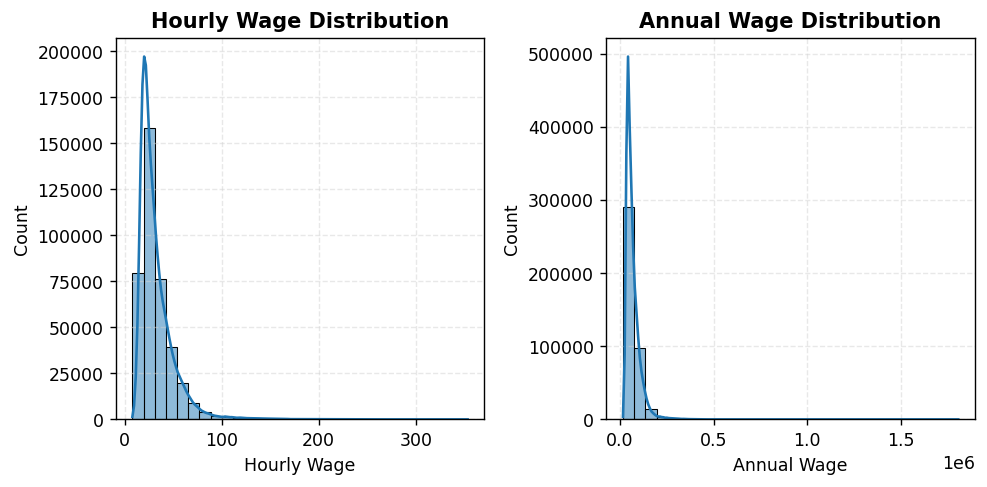

In [ ]:
plt.subplots(1, 2, figsize=(8, 4), dpi=125)
plt.subplot(1, 2, 1)
sns.histplot(oes_subset_df['label.mean_hourly_wage'].dropna(), kde=True, bins=30)
plt.title('Hourly Wage Distribution', fontweight = 'bold')
plt.xlabel('Hourly Wage')
plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

plt.subplot(1, 2, 2)
sns.histplot(oes_subset_df['label.mean_annual_wage'].dropna(), kde=True, bins=30)
plt.title('Annual Wage Distribution', fontweight = 'bold')
plt.xlabel('Annual Wage')
plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

plt.tight_layout()
plt.show()

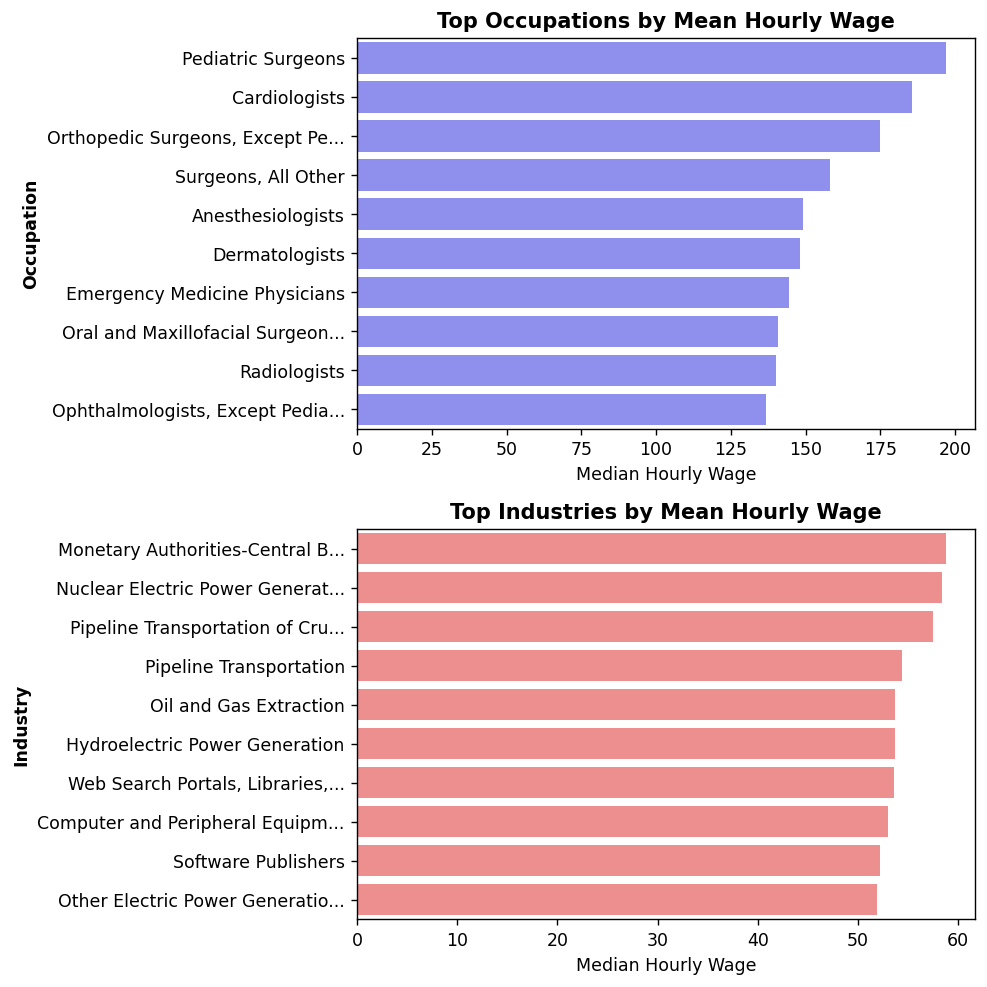

In [ ]:
# Median Wage by Occupation and Industry (Top 10)
by_occ_hourly = oes_subset_df.groupby('feature.occupation_title')[
    ['label.mean_hourly_wage', 'label.mean_annual_wage']
].mean().sort_values(by='label.mean_hourly_wage', ascending=False)
by_industry_hourly = oes_subset_df.groupby('feature.naics_title')[
    ['label.mean_hourly_wage', 'label.mean_annual_wage']
].mean().sort_values(by='label.mean_hourly_wage', ascending=False)

top10_occ_hourly = by_occ_hourly.head(10)['label.mean_hourly_wage']
top10_industry_hourly = by_industry_hourly.head(10)['label.mean_hourly_wage']

# Crop text function so that both subfigures are properly aligned
def crop_text(text, max_length=30):
    if len(text) > max_length:
        return text[:max_length] + '...'
    return text

plt.subplots(2, 1, figsize=(8, 8), dpi=125)

# Plot Median Hourly Wage by Top 10 Occupations
plt.subplot(2, 1, 1)
sns.barplot(
    x=top10_occ_hourly,
    y=list(map(crop_text, top10_occ_hourly.index)),
    color='blue',
    alpha=0.5
)
plt.title('Top Occupations by Mean Hourly Wage', fontweight = 'bold')
plt.xlabel('Median Hourly Wage')
plt.ylabel('Occupation', fontweight = 'bold')


# Plot Median Hourly Wage by Top 10 Industries
plt.subplot(2, 1, 2)
sns.barplot(
    x=top10_industry_hourly,
    y=list(map(crop_text, top10_industry_hourly.index)),
    color='red', alpha=0.5
)
plt.title('Top Industries by Mean Hourly Wage', fontweight = 'bold')
plt.xlabel('Median Hourly Wage')
plt.ylabel('Industry', fontweight = 'bold')

plt.tight_layout()
plt.show()

For the next milestone, we will load the unified pickle file of the OES data and the additional features coming from the CSC and weather/temperature datasets.

## **Datasets**

For debugging dataset, we could simply load the data for one state, for example (FIPS code = 1). For working dataset, we load the whole dataset.

In [21]:
oes_debug_df = oes_all_df[oes_all_df['AREA'] == '1']
oes_debug_df

,ANNUAL,AREA,AREA_TITLE,AREA_TYPE,A_MEAN,A_MEDIAN,A_PCT10,A_PCT25,A_PCT75,A_PCT90,...,LOC_QUOTIENT,MEAN_PRSE,NAICS,NAICS_TITLE,OWN_CODE,OCC_CODE,OCC_TITLE,PCT_TOTAL,TOT_EMP,YEAR
177501,NaN,1,Alabama,2,53400.0,41350.0,22620.0,29580.0,62580.0,96050.0,...,1.00,0.2,000000,Cross-industry,1235,00-0000,All Occupations,NaN,2053090.0,2023
177552,NaN,1,Alabama,2,116920.0,99740.0,50710.0,73180.0,139810.0,198520.0,...,0.74,0.5,000000,Cross-industry,1235,11-0000,Management Occupations,NaN,105580.0,2023
177603,NaN,1,Alabama,2,221030.0,165320.0,65700.0,123960.0,212180.0,NaN,...,0.25,5.8,000000,Cross-industry,1235,11-1011,Chief Executives,NaN,720.0,2023
177652,NaN,1,Alabama,2,129310.0,103320.0,48080.0,72260.0,162760.0,234080.0,...,0.73,1.1,000000,Cross-industry,1235,11-1021,General and Operations Managers,NaN,34450.0,2023
177703,1.0,1,Alabama,2,33690.0,24470.0,18320.0,19670.0,45050.0,55070.0,...,2.60,5.1,000000,Cross-industry,1235,11-1031,Legislators,NaN,1140.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120566,NaN,1,Alabama,2,21300.0,19320.0,16140.0,17330.0,23590.0,31100.0,...,0.90,2.2,000000,Cross-industry,1235,53-7064,"Packers and Packagers, Hand",NaN,8450.0,2011
5120567,NaN,1,Alabama,2,47780.0,51650.0,26460.0,38860.0,57410.0,60860.0,...,1.02,5.2,000000,Cross-industry,1235,53-7071,Gas Compressor and Gas Pumping Station Operators,NaN,60.0,2011
5120568,NaN,1,Alabama,2,27630.0,26730.0,17680.0,21170.0,33000.0,39510.0,...,1.63,2.1,000000,Cross-industry,1235,53-7081,Refuse and Recyclable Material Collectors,NaN,2830.0,2011
5120569,NaN,1,Alabama,2,46280.0,42300.0,30950.0,35230.0,61250.0,71910.0,...,3.44,6.3,000000,Cross-industry,1235,53-7121,"Tank Car, Truck, and Ship Loaders",NaN,530.0,2011


# **Distribution of Work**

The work of this notebook was distributed as follows:

| Name              | Contribution | Details                    |
|-------------------|--------------|----------------------------|
| Shashank Kushwaha |    25%       | Coordinate the group, downloaded initial datasets, enhanced overall code   |
| Johann J Cardenas |    25%       | Extended and processed datasets, cleaned files and added initial |
| Manoj Lakshmi     |    25%       | Drafted initial code for data processing and pickling, refined analysis code   |
| Nghia Dai Nguyen  |    25%       | Review, debug and enhanced overall code. Finetuned 1st deliverable |

This distribution of effort was approved by

- Shashank Kushwaha (sk89@illinois.edu )
- Johann Cardenas Huaman (johannc2@illinois.edu)
- Manoj Lakshmi (lmanoj2@illinois.edu)
- Nghia Dai Nguyen (nghiadn2@illinois.edu)